In [26]:
# make sure you've got the following packages installed
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.ndimage as spimg
import scipy.fftpack as spfft
import cvxpy as cvx

In [27]:
def dct2(x):
    return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

def idct2(x):
    return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

# read original image and downsize for speed
Xorig = plt.imread('lena512.bmp') # read in grayscale
X = spimg.zoom(Xorig, 0.04)
ny,nx = X.shape

Text(0.5, 1.0, 'Original Image')

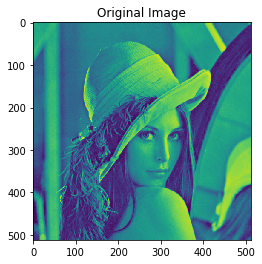

In [28]:
plt.imshow(Xorig)
plt.title('Original Image')

Text(0.5, 1.0, 'Downsized original image')

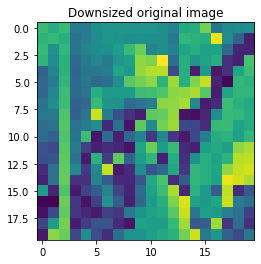

In [29]:
plt.imshow(X)
plt.title('Downsized original image')

In [30]:
# extract small sample of signal
k = round(nx * ny * 0.5) # 50% sample
ri = np.random.choice(nx * ny, k, replace=False) # random sample of indices
b = X.T.flat[ri]
b = np.expand_dims(b, axis=1)

# create dct matrix operator using kron (memory errors for large ny*nx)
A = np.kron(spfft.idct(np.identity(nx), norm='ortho', axis=0), spfft.idct(np.identity(ny), norm='ortho', axis=0))
A = A[ri,:] # same as phi times kron
print(A.shape)
print(b.shape)
# do L1 optimization
vx = cvx.Variable((nx * ny,1))
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == b]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)
Xat2 = np.array(vx.value).squeeze()

(200, 400)
(200, 1)


C:\Users\deept\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)



ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +5e+05  9e-01  1e-02  1e+00  7e+02    ---    ---    1  2  - |  -  - 
 1  +2.968e+03  +3.023e+03  +2e+05  8e-01  5e-03  6e+01  3e+02  0.6549  1e-01   2  1  1 |  0  0
 2  +4.354e+03  +4.368e+03  +3e+04  2e-01  7e-04  1e+01  4e+01  0.8940  3e-02   1  1  1 |  0  0
 3  +8.811e+03  +8.815e+03  +8e+03  4e-02  2e-04  5e+00  1e+01  0.7721  6e-02   1  0  1 |  0  0
 4  +1.032e+04  +1.032e+04  +2e+03  1e-02  5e-05  2e+00  3e+00  0.7343  4e-02   1  0  1 |  0  0
 5  +1.070e+04  +1.070e+04  +1e+03  4e-03  2e-05  7e-01  1e+00  0.6428  5e-02   1  1  1 |  0  0
 6  +1.084e+04  +1.084e+04  +4e+02  1e-03  7e-06  3e-01  4e-01  0.6834  8e-02   1  1  1 |  0  0
 7  +1.089e+04  +1.089e+04  +1e+02  6e-04  3e-06  1e-01  2e-01  0.6108  6e-02   1  1  1 |  0  0
 8  +1.091e+04  +1.091e+04  +5e+01  2e-04  1e-

In [31]:
# reconstruct signal
Xat = Xat2.reshape(nx, ny).T # stack columns
Xa = idct2(Xat)

Text(0.5, 1.0, 'Reconstructed image')

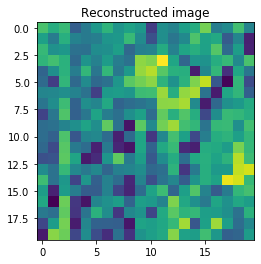

In [32]:
plt.imshow(Xa)
plt.title('Reconstructed image')